# Project: Investigate a Dataset - [TMDb]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1.Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

>Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis
#### 1.Which genres are most popular over the years ? 
#### 2.who are the top 10 popular cast actors over the years? 
#### 3.who are the top 10 directors over the years ? 
#### 4.what are the top 10 production companies over the years ? 
#### 5.what are the 10 worst popular movies?
#### 6.what are the top 10 popular movies?
#### 7.what are the worst 10 movies by revenue?
#### 8.what are the top 10 movies by revenue?
#### 9.what are the top 10 movies withe the highest budget?
#### 10.what are the top 10 movies withe the highest profit?
#### 11.what are the top 10 movies withe the highest runtime?
#### 12.what are the top 10 movies withe the lowest runtime?
#### 13.what are the top 10 movies withe the highest vote_count?
#### 14.what are the top 10 years in movie production?
#### 15.what is the most comman month in movie production over the years?
#### 16.what is the top month in movie production for each top 10 years ?
#### 17.What kinds of properties are associated with movies that have high revenues?
#### 17.1.correlation ratio bettwen popularity and revenue
#### 17.2.correlation ratio bettwen budget and profit
#### 17.3.correlation ratio bettwen runtime and revenue
#### 17.4.correlation ratio bettwen vote_count and revenue
#### 17.5.correlation ratio bettwen vote_average and revenue
#### 17.6.inflation ratio bettwen revenue_adj and revenue
#### 17.7.inflation ratio bettwen budget_adj and budget
#### 17.8.Correlation Relation Map

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## 2.Data Wrangling

In [51]:
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


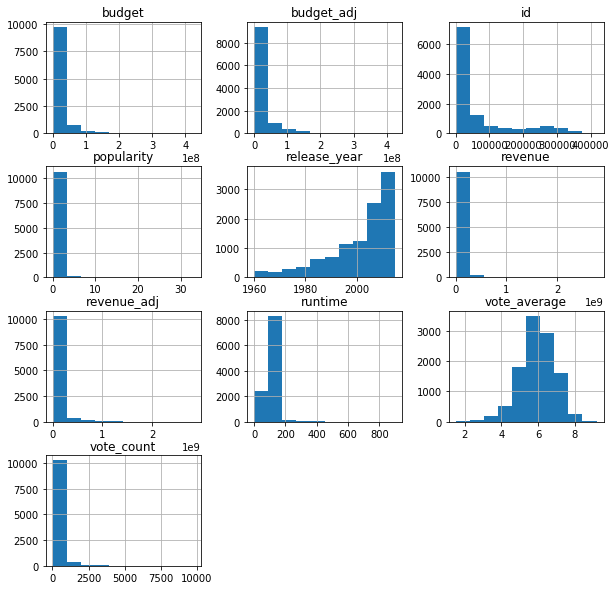

In [5]:
df.hist(figsize=(10,10));


### Data Cleaning

### structure of the data
>cast,director,genres,production_companies values are separeted by "|"

>in columns ['budget','revenue','budget_adj','revenue_adj'] there are alot of zero values need to be filled 

>in ['runtime'] column zero value sheld be NAN

>unwanted columns ['imdb_id','homepage','tagline','keywords','overview']

>data type in ['release_date'] need to be adjusted

>need to create a column to calculate net profit

In [52]:
df['budget'].replace(0,df['budget'].mean(), inplace=True)
df['revenue'].replace(0,df['revenue'].mean(), inplace=True)
df['budget_adj'].replace(0,df['budget_adj'].mean(), inplace=True)
df['revenue_adj'].replace(0,df['revenue_adj'].mean(), inplace=True)
df['runtime'].replace(0,np.NAN, inplace=True)
df.drop_duplicates(inplace=True)
df.drop(['imdb_id','homepage','tagline','keywords','overview'],axis =1,inplace = True)
df['profit']=df['revenue']-df['budget']
df['release_date'] = pd.to_datetime(df['release_date'])


In [53]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09


<a id='eda'></a>
## 3.Exploratory Data Analysis

### This function to return a pie chart for the the top 10 values in columns
### [cast] , [director] , [genres] and [production_companies]

In [86]:
def pie_chart_top_10(column):
    """
    Loads data from columns cast,director,genres,production_companies
    and create a pie_chart.
    Args:
        (str) column : name of column need to analyze
    """
    join_values=df[column].str.cat(sep='|')
    split_values=pd.Series(join_values.split('|'))
    split_values.value_counts().iloc[0:10].plot(kind='pie',figsize=(8,8),fontsize=12,autopct=lambda x:('%1.1f%%' % x) if x>2 else '');


## 1.Which genres are most popular over the years ? 

Text(0.5,1,'popular genres')

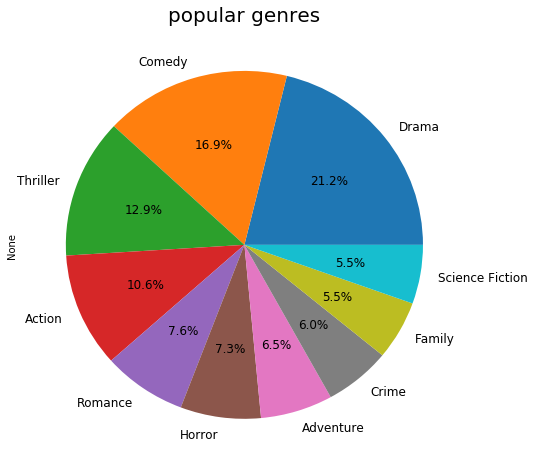

In [87]:
pie_chart_top_10('genres')
plt.title('popular genres',fontsize=20)

>This pie chart shows that Drama ,comedy and Thriller genres are the most common in movie production 

## 2.who are the top 10 popular cast actors over the years? 

Text(0.5,1,'popular cast actor')

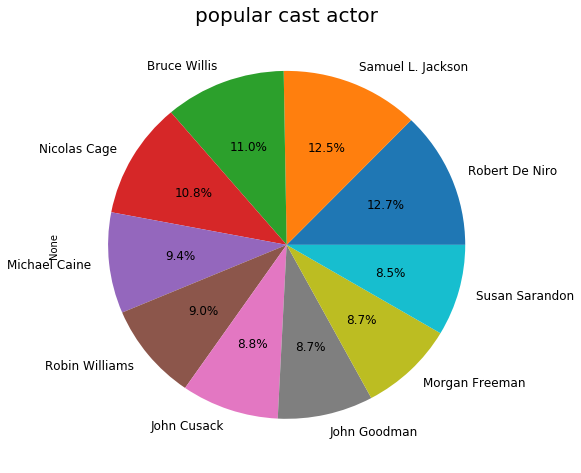

In [88]:
pie_chart_top_10('cast')
plt.title('popular cast actor',fontsize=20)

>This pie chart shows the top 10 most common actor to apear in movies Robert de niro , Samuel L.jackson are the top two

## 3.who are the top 10 directors over the years ? 

Text(0.5,1,'popular director')

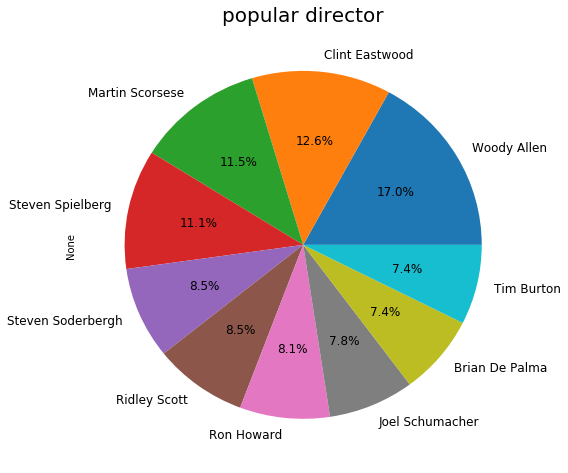

In [89]:
pie_chart_top_10('director')
plt.title('popular director',fontsize=20)

>This pie chart shows the top 10 most common Directors to make movies, Woody Allen is the top most comon 

## 4.what are the top 10 production companies over the years ? 

Text(0.5,1,'popular companies')

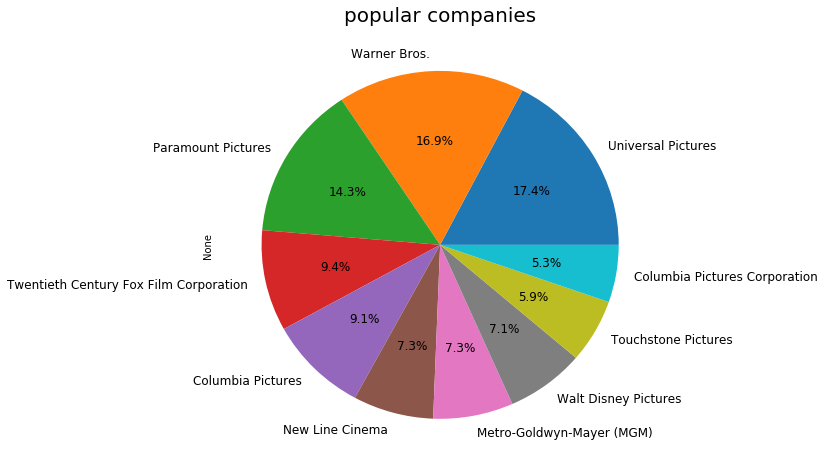

In [90]:
pie_chart_top_10('production_companies')
plt.title('popular companies',fontsize=20)

>This pie chart shows the top 10 production companies in making movies, universal pictures , warner bros. are the top two

### this function returns a bar chart for top 10 movies based on columns:
>popularity,budget,revenue,runtime,vote_count,vote_average,profit

In [72]:
def bar_chart_top_10_movies(column):
    """
    Loads data from column original_title
    and create a bar chart for top 10 movies based on :
    popularity,budget,revenue,runtime,vote_count,vote_average,profit
    Args:
        (str) column : name of column need to analyze by original_title
    """
    df.sort_values(by=[column],ascending=False).iloc[0:10].plot(x='original_title',y=column,kind='bar',figsize=(15,8),fontsize=20);
    plt.title('Top 10 {} Movies'.format(column),fontsize=20)
    plt.xlabel('Movie_Title',fontsize=20)
    plt.ylabel(column,fontsize=20)

### this function returns a bar chart for worst 10 movies based on columns:
>popularity,budget,revenue,runtime,vote_count,vote_average,profit

In [70]:
def bar_chart_worst_10_movies(column):
    """
    Loads data from column original_title
    and create a bar chart for worst 10 movies based on :
    popularity,budget,revenue,runtime,vote_count,vote_average,profit
    Args:
        (str) column : name of column need to analyze by original_title
    """
    df.sort_values(by=[column]).iloc[0:10].plot(x='original_title',y=column,kind='bar',figsize=(15,8),fontsize=20);
    plt.title('Worst 10 {} Movies'.format(column),fontsize=20)
    plt.xlabel('Movie_Title',fontsize=20)
    plt.ylabel(column,fontsize=20)

## 5.what are the top 10 popular movies?

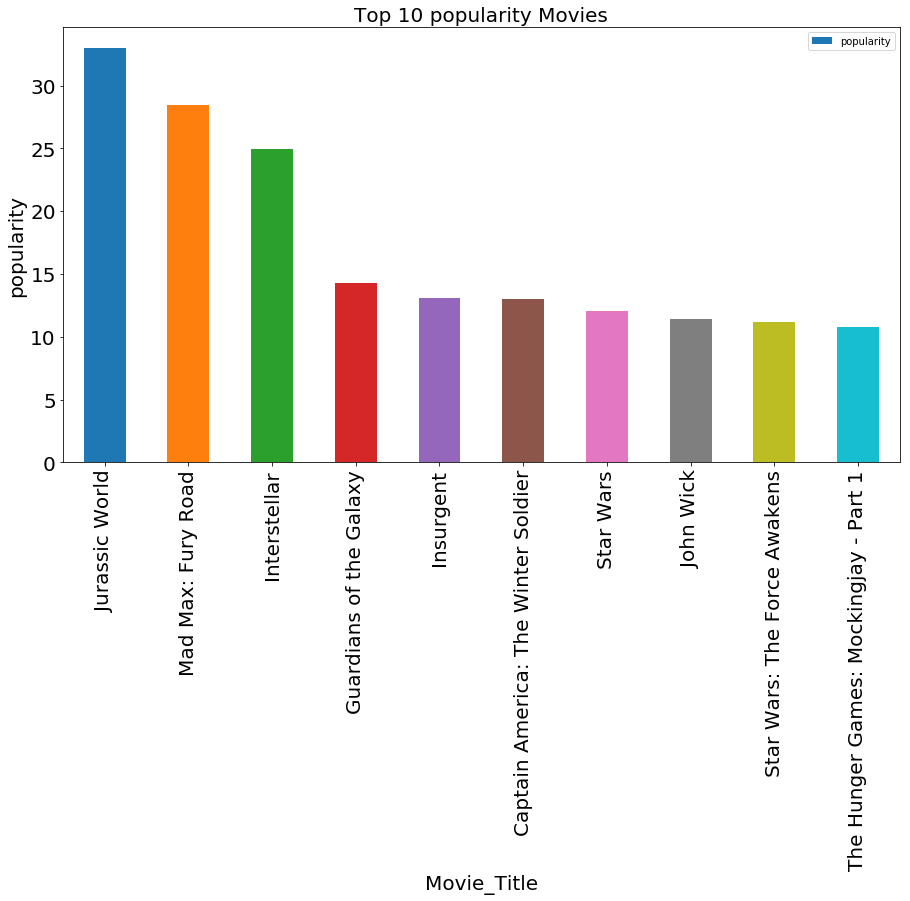

In [73]:
bar_chart_top_10_movies('popularity')

>This bar chart shows the top 10 popular movies, jurassic world is the most popular

## 6.what are the 10 worst popular movies?

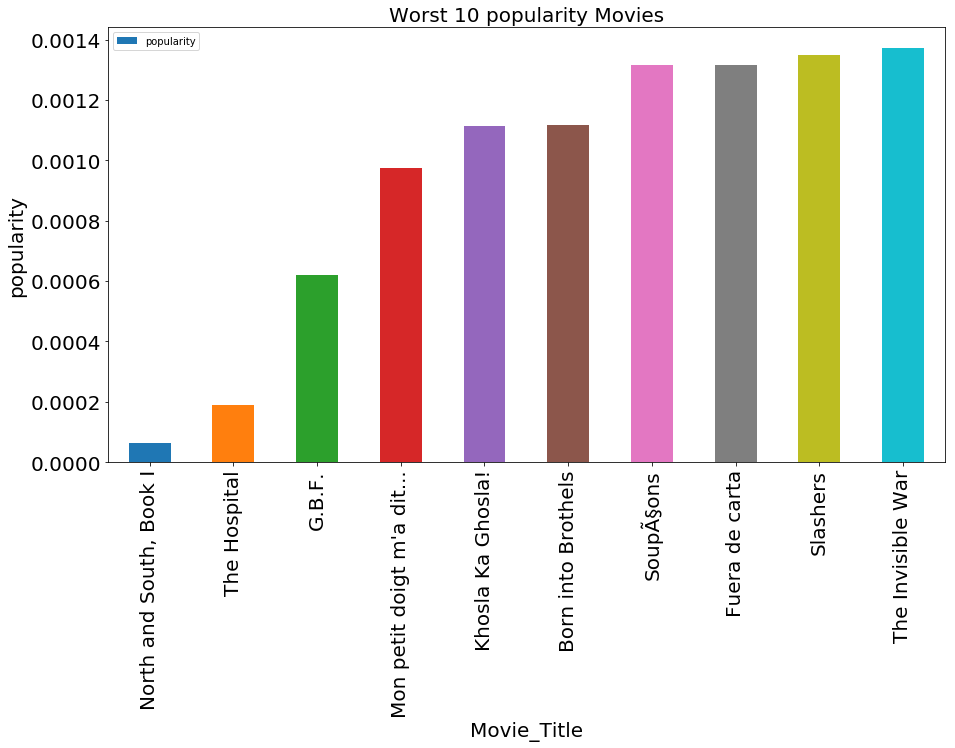

In [71]:
bar_chart_worst_10_movies('popularity')

>This bar chart shows the worst 10 popular movies, north and south,book i is the worst

## 7.what are the worst 10 movies by revenue?

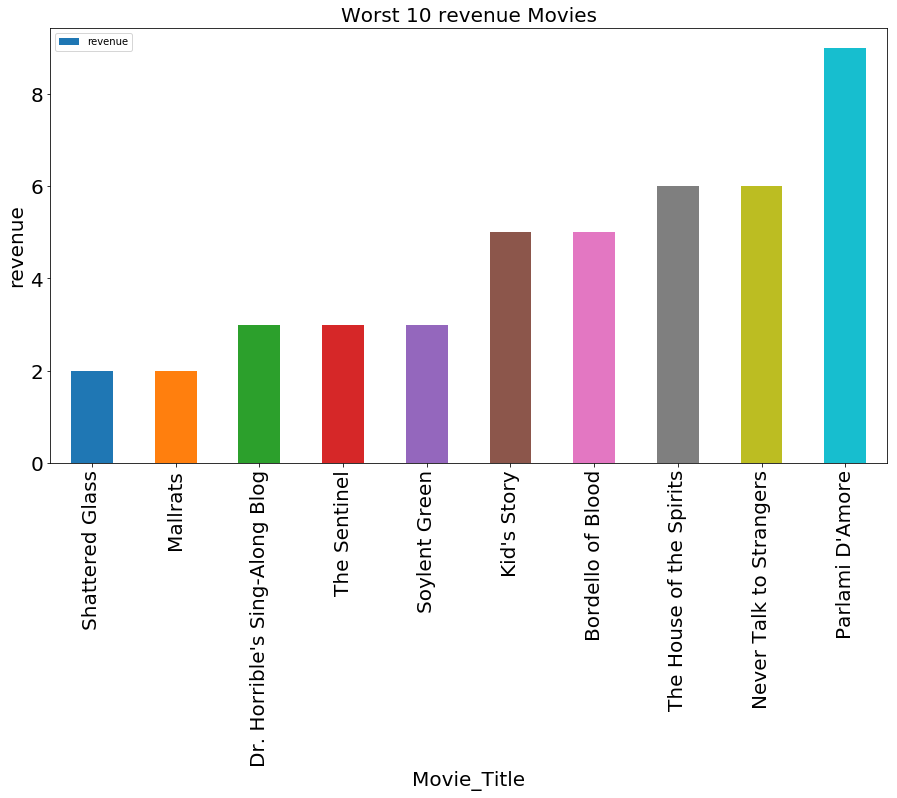

In [74]:
bar_chart_worst_10_movies('revenue')

>This bar chart shows the lowest 10 movies in revenues, shattered glass is the lowest

## 8.what are the top 10 movies by revenue?

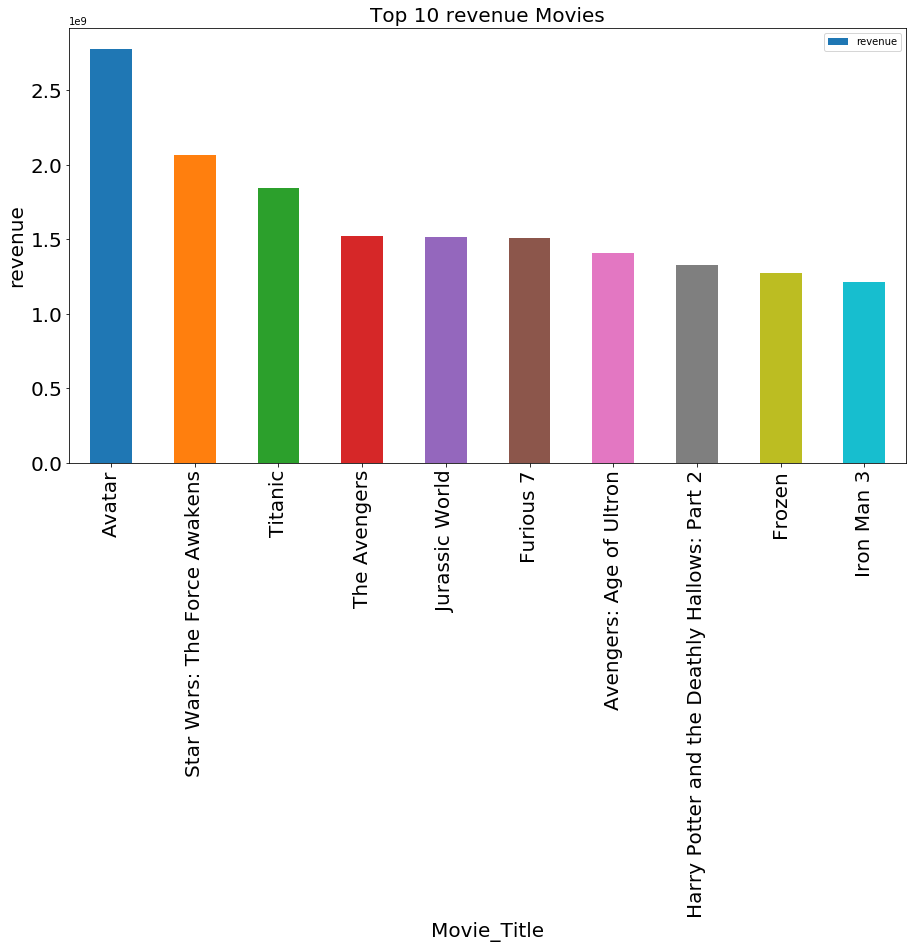

In [75]:
bar_chart_top_10_movies('revenue')

>This bar chart shows the highest 10 movies in revenue , avatar is the highest

## 9.what are the top 10 movies with the highest budget?

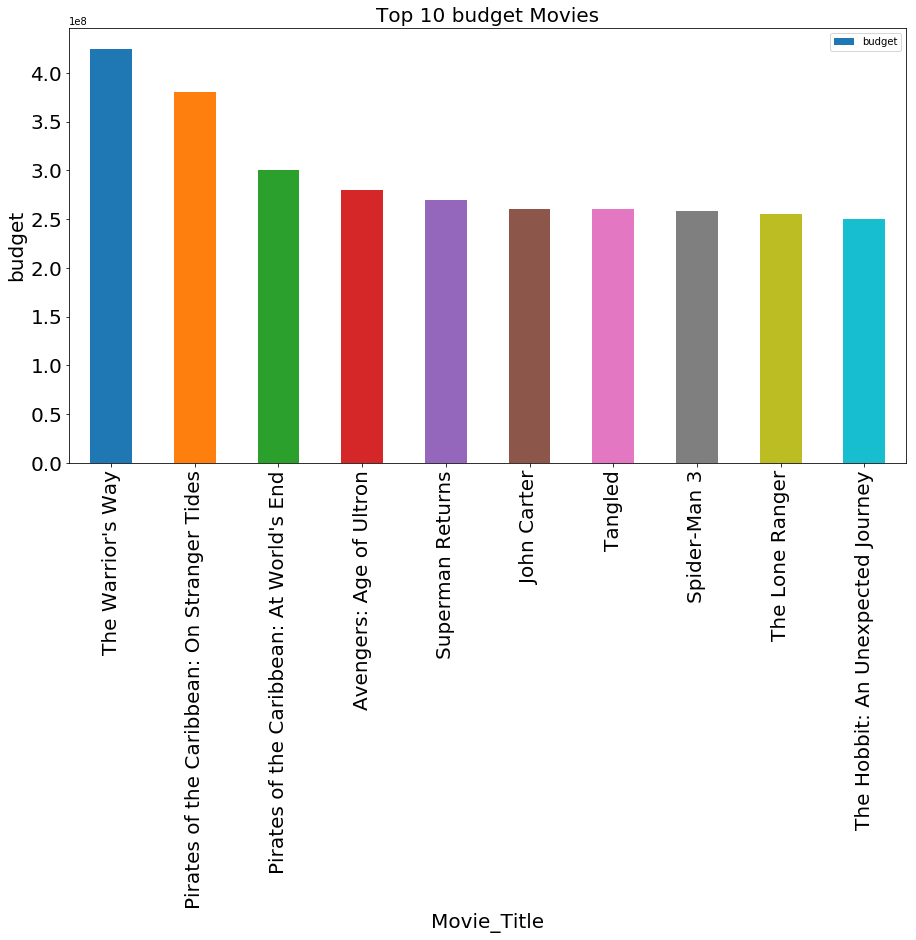

In [76]:
bar_chart_top_10_movies('budget')

>This bar chart shows the top 10 movies with the highest budget,the warrior's way is the highest

## 10.what are the top 10 movies withe the highest profit?

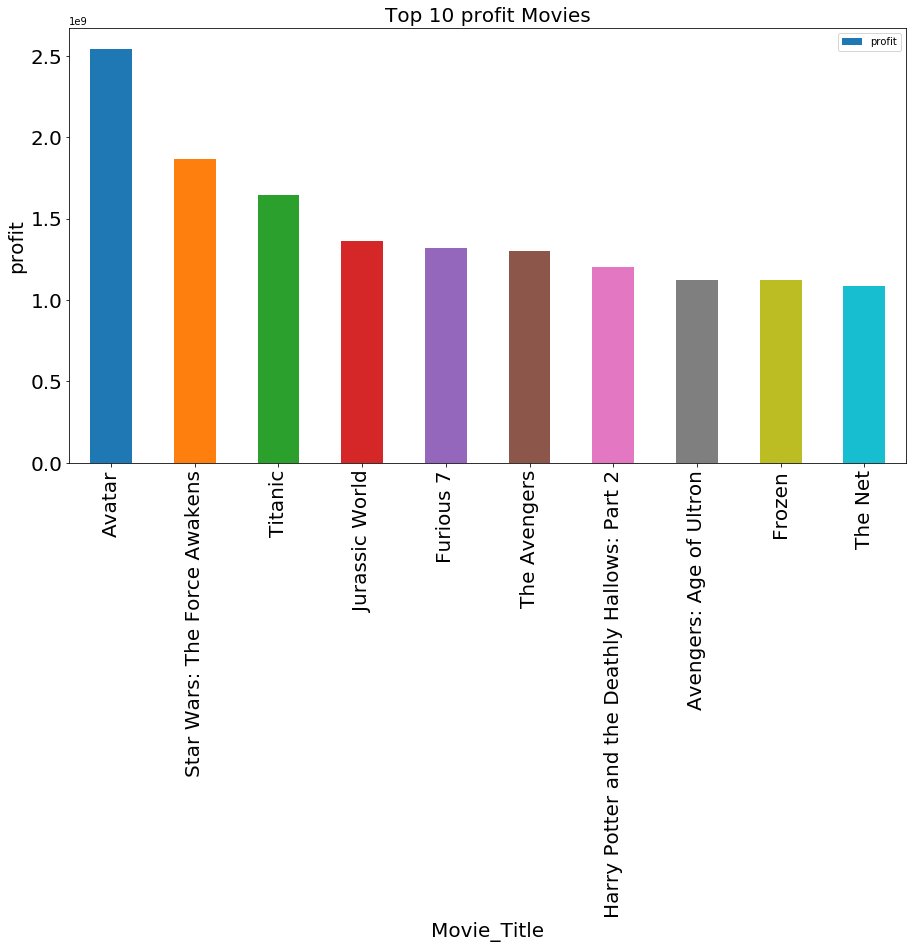

In [77]:
bar_chart_top_10_movies('profit')

>This bar chart shows the top 10 movies with the highest profit,avatar is the highest

## 11.what are the top 10 movies withe the highest runtime?

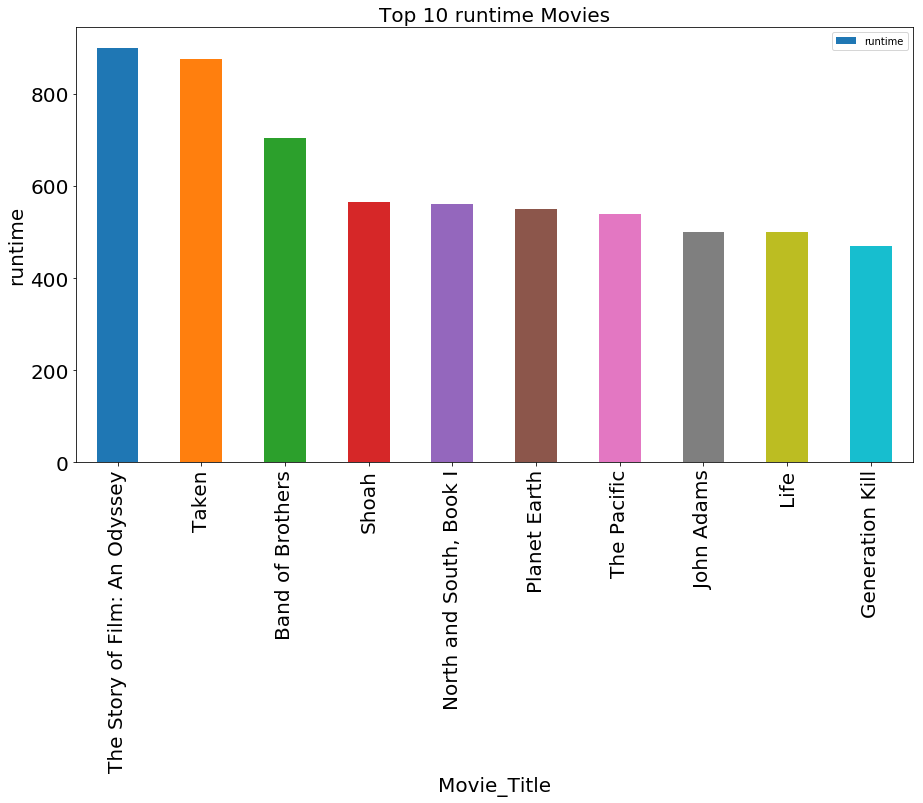

In [78]:
bar_chart_top_10_movies('runtime')

>This bar chart shows the top 10 movies with the highest runtime,the story of film:An Odyssey is the longest

## 12.what are the top 10 movies withe the lowest runtime?

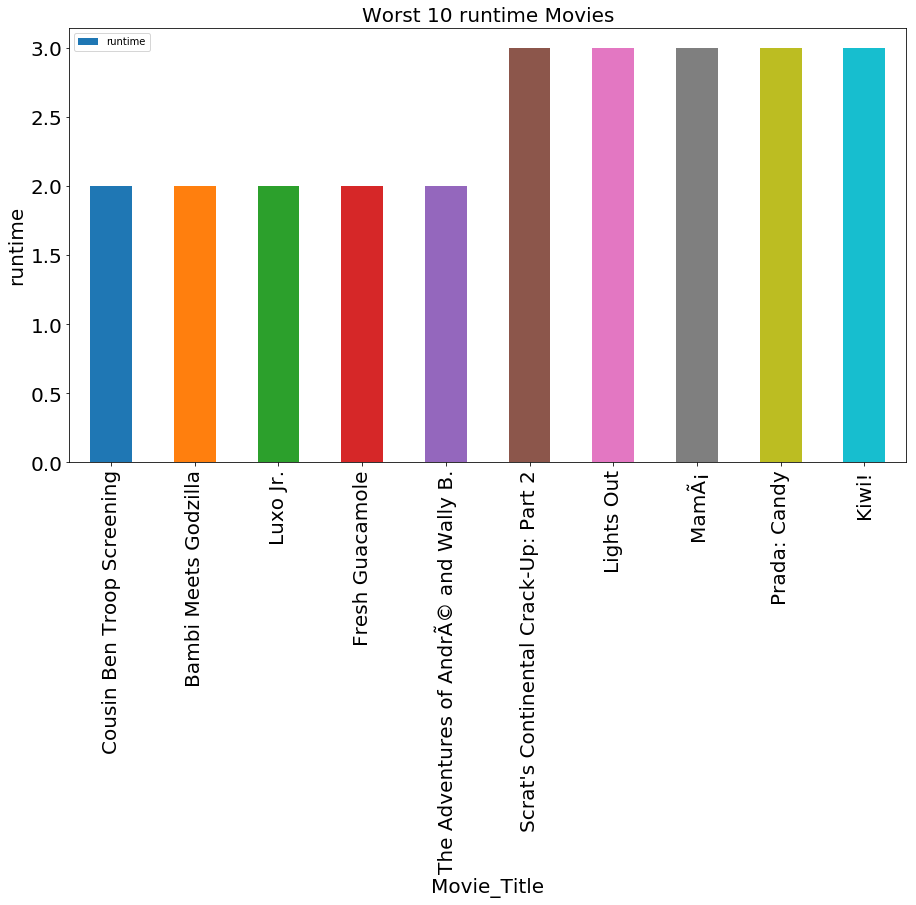

In [79]:
bar_chart_worst_10_movies('runtime')

>This bar chart shows the top 10 movies with the lowest runtime,cousin ben troop screening is the shortest

## 13.what are the top 10 movies withe the highest vote_count?

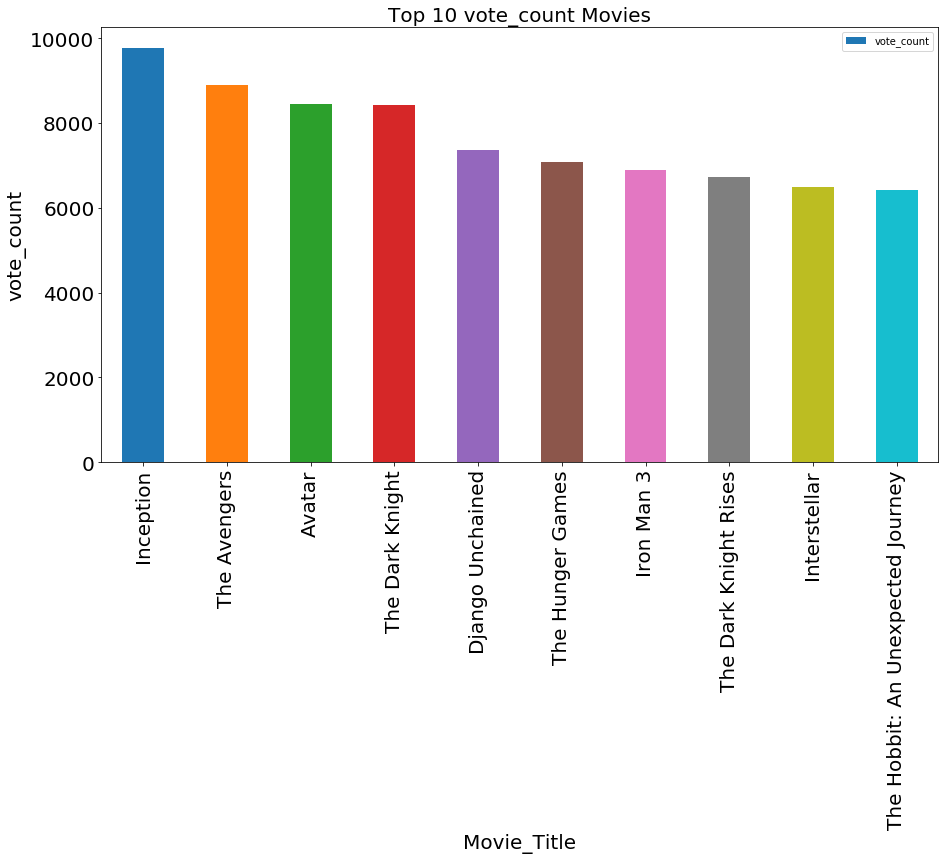

In [80]:
bar_chart_top_10_movies('vote_count')

>This bar chart shows the top 10 movies with the highest vote_count,inception is the highest

## 14.what are the top 10 years in movie production?

Text(0,0.5,'produced_movies')

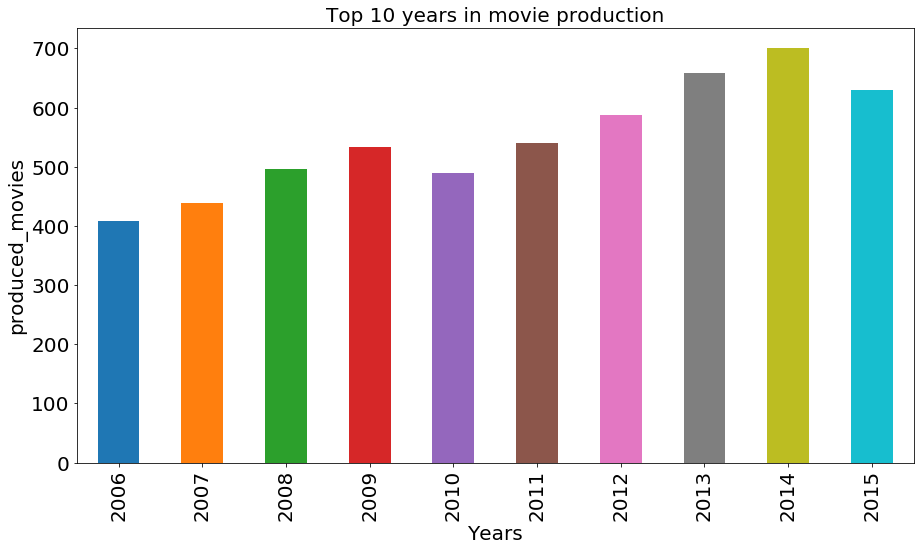

In [81]:
df['release_year'].value_counts().iloc[0:10].sort_index().plot(kind='bar',figsize=(15,8),fontsize=20);
plt.title('Top 10 years in movie production',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.ylabel('produced_movies',fontsize=20)

>this bar chart shows the top 10 years in movie production, year 2014 is the highest which made 700 movies

## 15.what is the most comman month in movie production over the years?

Text(0,0.5,'produced_movies')

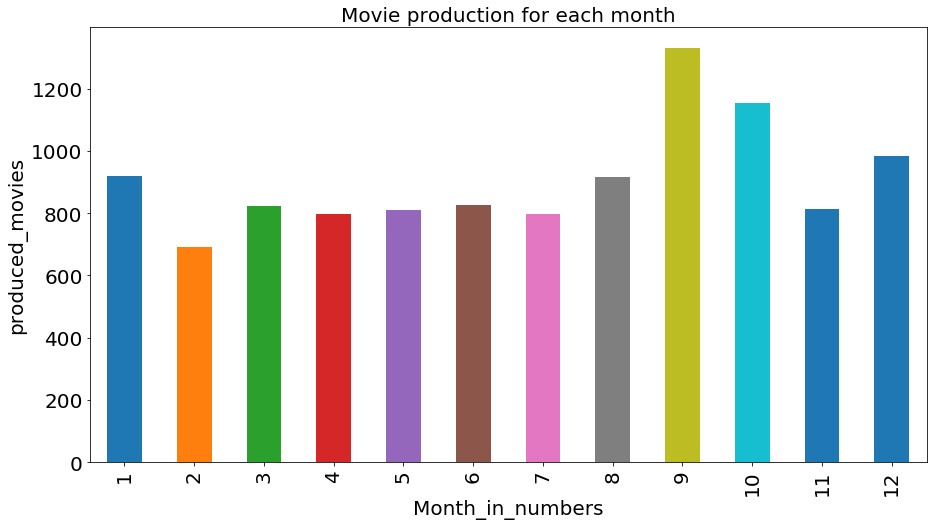

In [85]:
df['release_date'].dt.month.value_counts().sort_index().plot(kind='bar',figsize=(15,8),fontsize=20);
plt.title('Movie production for each month',fontsize=20)
plt.xlabel('Month_in_numbers',fontsize=20)
plt.ylabel('produced_movies',fontsize=20)

>this bar chart shows that september has the highest movies over the years

## 16.what is the top month in movie production for each top 10 years ?

### 16.1. view (df_Top_month_year) 
#### months are represented by numbers in the table

In [92]:
df_Top_month_year=pd.DataFrame(columns=['year','top_month','produced_movies'])
Top_10_years=df['release_year'].value_counts().iloc[0:10].sort_index().index

for year in Top_10_years:
    top_month=df[df['release_year'] == year].groupby(df['release_date'].dt.month).count()['id'].sort_values(ascending=False).index[0]
    produced_movies=df[df['release_year'] == year].groupby(df['release_date'].dt.month).count()['id'].sort_values(ascending=False).iloc[0]

    df_Top_month_year=df_Top_month_year.append({'year':year,'top_month':top_month,'produced_movies':produced_movies},ignore_index=True)

df_Top_month_year

,year,top_month,produced_movies
0,2006,9,66
1,2007,9,71
2,2008,10,65
3,2009,1,75
4,2010,9,63
5,2011,9,95
6,2012,9,97
7,2013,9,86
8,2014,9,98
9,2015,9,74


>this table contain of the number of movies of the highest month in each year 

### 16.2.Bar chart for top month in movie production for each year

Text(0,0.5,'Month_in_numbers')

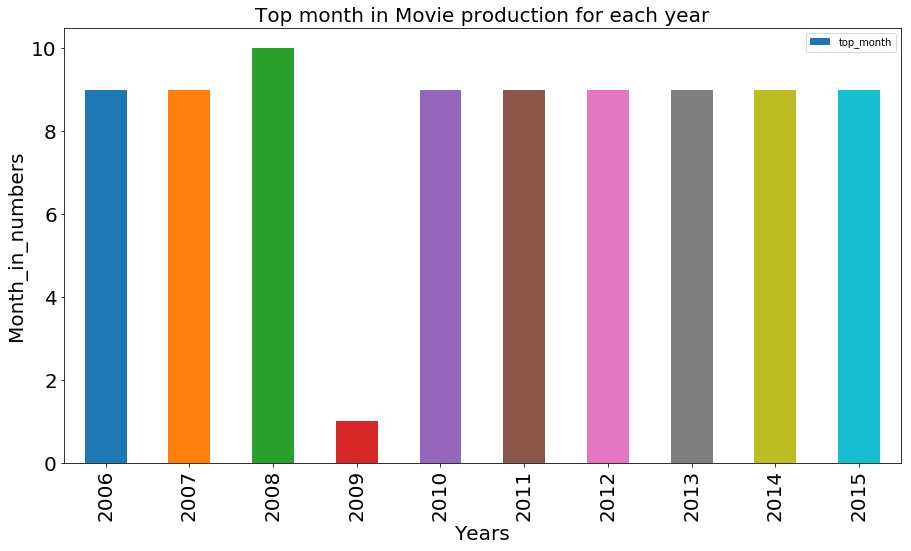

In [93]:
df_Top_month_year.plot(x='year',y='top_month',kind='bar',figsize=(15,8),fontsize=20);
plt.title('Top month in Movie production for each year',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Month_in_numbers',fontsize=20)

>this bar chart shows that in top 10 years most movie production are released in september excpt 2009 in january ,2008 in october 

# What kinds of properties are associated with movies that have high revenues?

### this function returns the correlation ratio bettwen 2 columns:

In [94]:
def correlation_ratio(column1,column2):
    """
    calculate the correlation ration of two columns
    and create a scatter chart for this relation :
    Args:
        (str) column1 : name of the first column need to analyze
        (str) column2 : name of the second column need to analyze
    """
    df.plot(x=column1,y=column2,kind='scatter',figsize=(15,5),fontsize=20);
    plt.title('correlation ratio bettwen {} and {}'.format(column1,column2),fontsize=20)
    plt.xlabel(column1,fontsize=20)
    plt.ylabel(column2,fontsize=20)
    print('the relationship bettwen {} and {} has a correlation ration of: {}'.format(column1,column2,df.corr().loc[column2,column1]))

## 1.correlation ratio bettwen popularity and revenue

the relationship bettwen revenue and popularity has a correlation ration of: 0.6352913144801481


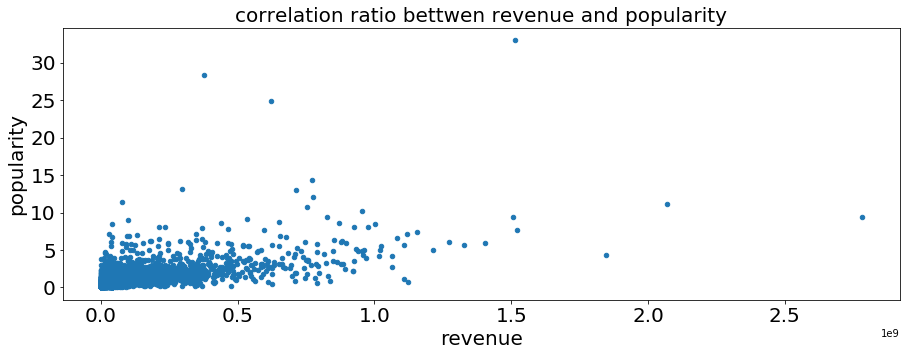

In [95]:
correlation_ratio('revenue','popularity')

>this scatter plot shows that there is a positive correlation ration of: 0.6352913144801481 bettwen popularity and revenue

## 2.correlation ratio bettwen budget and profit

the relationship bettwen budget and profit has a correlation ration of: 0.5386676555915941


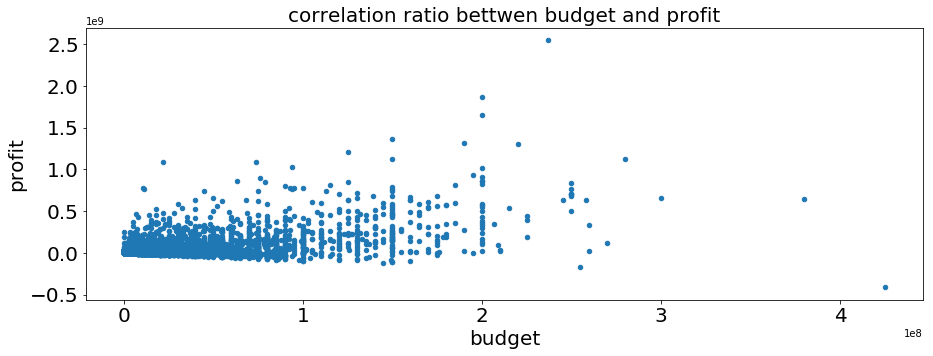

In [96]:
correlation_ratio('budget','profit')

>this scatter plot shows that there is a positive correlation ration of: 0.5386676555915941 bettwen budget and profit

## 3.correlation ratio bettwen runtime and revenue

the relationship bettwen runtime and revenue has a correlation ration of: 0.1418496563001401


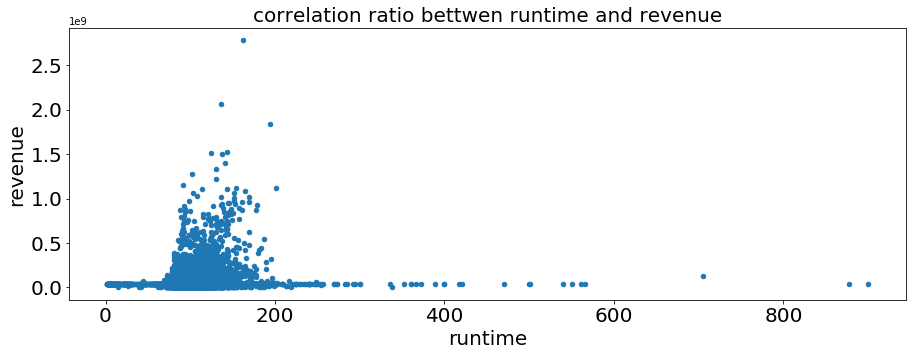

In [97]:
correlation_ratio('runtime','revenue')

>this scatter plot shows that there is a positive correlation ration of: 0.1418496563001401 bettwen runtime and revenue

## 4.correlation ratio bettwen vote_count and revenue

the relationship bettwen vote_count and revenue has a correlation ration of: 0.772944247842725


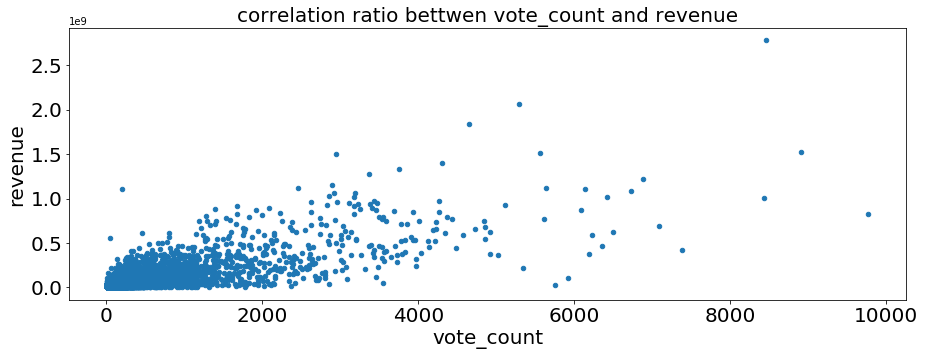

In [98]:
correlation_ratio('vote_count','revenue')

>this scatter plot shows that there is a positive correlation ration of: 0.772944247842725 bettwen vote_count and revenue

## 5.correlation ratio bettwen vote_average and revenue

the relationship bettwen vote_average and revenue has a correlation ration of: 0.1520545289708391


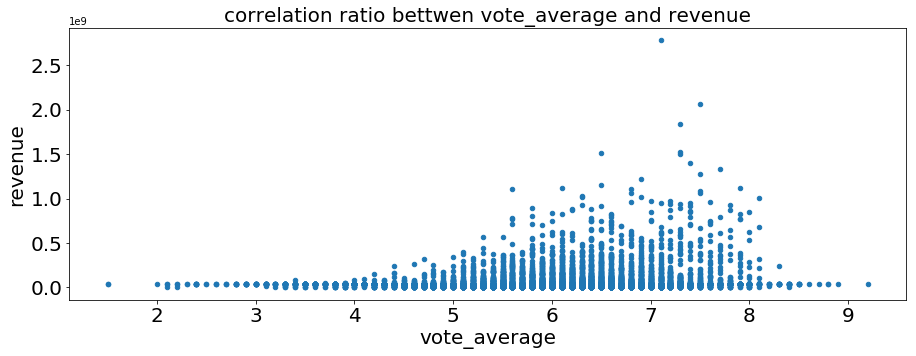

In [99]:
correlation_ratio('vote_average','revenue')

>this scatter plot shows that there is a positive correlation ration of: 0.1520545289708391 bettwen vote_average and revenue

## 6.inflation ratio bettwen revenue_adj and revenue

the relationship bettwen revenue_adj and revenue has a correlation ration of: 0.909826279273281


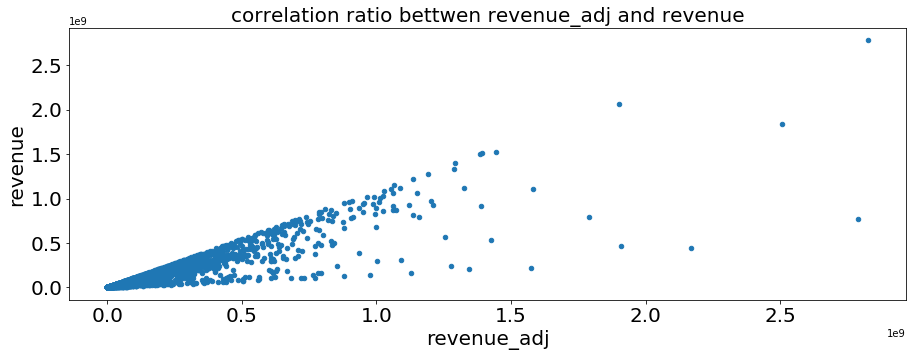

In [100]:
correlation_ratio('revenue_adj','revenue')

>this scatter plot shows that there is a positive correlation ration of: 0.909826279273281 bettwen revenue_adj and revenue

## 7.inflation ratio bettwen budget_adj and budget

the relationship bettwen budget_adj and budget has a correlation ration of: 0.9623971935359922


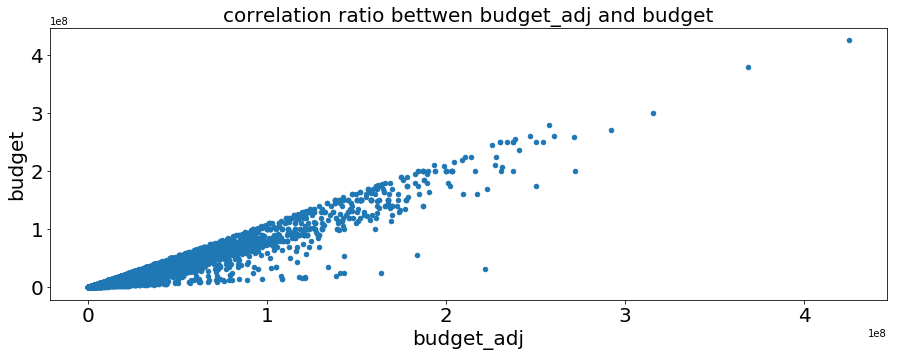

In [101]:
correlation_ratio('budget_adj','budget')

>this scatter plot shows that there is a positive correlation ration of: 0.9623971935359922 bettwen budget_adj and budget

## 8.Correlation Relation Map

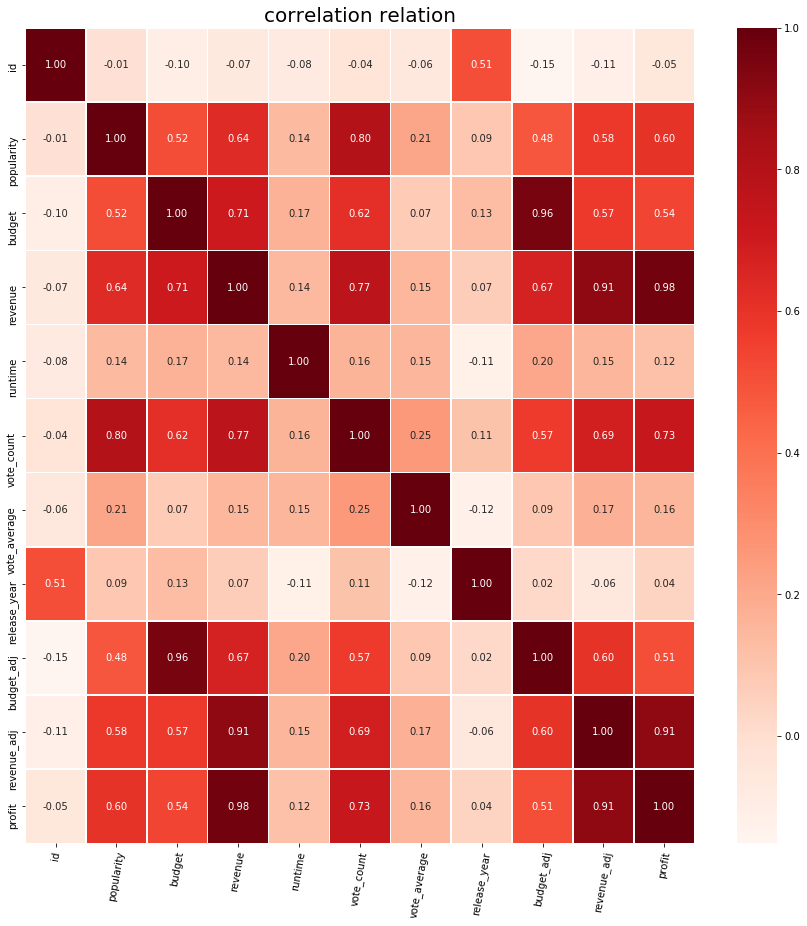

In [108]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap="Reds",linewidth=0.5,annot=True,fmt='.2f')
plt.xticks(rotation=80)
plt.title('correlation relation',fontsize=20);

>this table show an over all correlation relationship for all properties of our data set

<a id='conclusions'></a>
## 4.Conclusions

### Which genres are most popular from year to year? 
>Drama movies are the most comman to be produced then comedy and thriller movies over the years
### which month is better to release movies ?
>the most common month for producing movies is september over the years
>the top 10 years of movie production are from 2006 to 2015
>for most top 10 years ,september is the common month for producing movies except
>2008 was october ,2009 was january
### What kinds of properties are associated with movies that have high revenues?
>the relationship bettwen popularity and revenue has a positive correlation ration of: 0.6352913144801481
>the relationship bettwen vote_count and revenu has a positive correlation ration of: 0.772944247842725
>the relationship bettwen runtime and revenue has a positive correlation ration of: 0.1418496563001401
>the relationship bettwen vote_average and revenue has a positive correlation ration of: 0.1520545289708391
>the relationship bettwen budget and profit has a positive correlation ration of: 0.5386676555915941
>the relationship bettwen revenue_adj and revenue has a positive correlation ration of: 0.909826279273281
>the relationship bettwen budget_adj and budget has a positive correlation ration of: 0.9623971935359922
### base on the above informations: 
>popularity and vote_count affect revenue in a high ratio
>runtime and vote_average affect revenue in a low ratio
>most movie gets high profit if the budget in high 
>revenue_adj and budget_adj  have a positive ratio meaning inflation of the dollar increased more than 900 %
### Limitations
>cast,director,genres,production_companies values are separeted by "|" we had to separate values 

>in columns ['budget','revenue','budget_adj','revenue_adj'] there are alot of zero values need to be filled, we fill them with mean value

>in ['runtime'] column zero value sheld be NAN,we replaced them

>unwanted columns ['imdb_id','homepage','tagline','keywords','overview'],we removed the unwanted columns

>data type in ['release_date'] need to be adjusted to date time format to extract the month

>need to create a column to calculate net profit be substracting budget from revenue


In [12]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0